### Importing libraries 

In [1847]:
import pandas as pd
import seaborn as sns
import numpy as np
from dateutil import parser
import matplotlib as plt

### Importing Data

In [1848]:
df = pd.read_csv('data/ytdataframe.csv')

In [1858]:
df.head(5)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,...,duration,definition,caption,subscribers,totalViews,totalVideos,total polarity score,Label,pushblishYear,durationSecs
0,0,-SejlHOXexc,Tech Tutorial,How to download facebook stories in your phone,Hey friends today we have another great topic ...,"['facebook stories in your phone', 'download f...",2019-11-02 14:25:35+00:00,967622.0,11100.0,NaN,...,PT3M55S,hd,False,140000,8634729,161,0.0082,non reputable,2019,235.0
1,1,set4Kr8hX0w,Tech Tutorial,How to check whatsapp lastseen if hidden or bl...,Hello friends welcome to my channel Our today...,['How to check whatsapp lastseen if hidden or ...,2018-01-20 15:35:36+00:00,1477032.0,11922.0,NaN,...,PT4M44S,hd,False,140000,8634729,161,0.1820,non reputable,2018,284.0
2,2,s4EYU1ptpIs,Tech Tutorial,How to change voice during call | Male female ...,Hey friends today we have another great topic ...,"['How to change voice during call', 'voice cha...",2021-11-30 17:37:11+00:00,539109.0,9063.0,NaN,...,PT5M21S,hd,False,140000,8634729,161,0.0890,non reputable,2021,321.0
3,3,-lcPJAa6trw,Tech Tutorial,How to check who read my message in whatsapp g...,Hey friends today we have another great topic ...,['how to check who read message in whatsapp gr...,2018-05-07 15:12:51+00:00,322539.0,5355.0,NaN,...,PT3M,hd,False,140000,8634729,161,0.3620,non reputable,2018,180.0
4,4,G1F6W7QhrWU,Tech Tutorial,How to Record Messenger calls -facebook messen...,Hey friends today we have another great topic ...,"['How to Record Messenger calls', 'facebook me...",2021-10-07 16:18:54+00:00,41652.0,319.0,NaN,...,PT4M23S,hd,False,140000,8634729,161,0.3250,non reputable,2021,263.0


In [1849]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            83 non-null     int64  
 1   video_id              83 non-null     object 
 2   channelTitle          83 non-null     object 
 3   title                 83 non-null     object 
 4   description           83 non-null     object 
 5   tags                  78 non-null     object 
 6   publishedAt           83 non-null     object 
 7   viewCount             83 non-null     int64  
 8   likeCount             83 non-null     int64  
 9   favouriteCount        0 non-null      float64
 10  commentCount          83 non-null     int64  
 11  duration              83 non-null     object 
 12  definition            83 non-null     object 
 13  caption               83 non-null     bool   
 14  subscribers           83 non-null     int64  
 15  totalViews            83 

# Data preprocessing 

Checking duplicates

In [1850]:
df.duplicated().sum()


0

In [1851]:
df = df.drop_duplicates()
df.shape

(83, 19)

Checking null values

In [1860]:
df.isnull().sum()

Unnamed: 0               0
video_id                 0
channelTitle             0
title                    0
description              0
tags                     5
publishedAt              0
viewCount                0
likeCount                0
favouriteCount          83
commentCount             0
duration                 0
definition               0
caption                  0
subscribers              0
totalViews               0
totalVideos              0
total polarity score     0
Label                    0
pushblishYear            0
durationSecs             0
dtype: int64

Convert count columns to numeric

In [1853]:
numeric_cols = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

Convert publish date to year

In [1854]:
df['publishedAt'] = df['publishedAt'].apply(lambda x: parser.parse(x)) 
df['pushblishYear'] = df['publishedAt'].apply(lambda x: x.strftime("%Y")) 

Convert duration to seconds

In [1855]:
import isodate
df['durationSecs'] = df['duration'].apply(lambda x: isodate.parse_duration(x))
df['durationSecs'] = df['durationSecs'].astype('timedelta64[s]')

Add tag count

In [1856]:
# df['tagCount'] = df['tags'].apply(lambda x: 0 if x is None else len(x))

Dropping columns we wont use

In [1862]:
df = df.drop(['Unnamed: 0', 'publishedAt', 'duration', 'favouriteCount'], axis=1)


,video_id,channelTitle,title,description,tags,viewCount,likeCount,commentCount,definition,caption,subscribers,totalViews,totalVideos,total polarity score,Label,pushblishYear,durationSecs
0,-SejlHOXexc,Tech Tutorial,How to download facebook stories in your phone,Hey friends today we have another great topic ...,"['facebook stories in your phone', 'download f...",967622.0,11100.0,338.0,hd,False,140000,8634729,161,0.0082,non reputable,2019,235.0
1,set4Kr8hX0w,Tech Tutorial,How to check whatsapp lastseen if hidden or bl...,Hello friends welcome to my channel Our today...,['How to check whatsapp lastseen if hidden or ...,1477032.0,11922.0,861.0,hd,False,140000,8634729,161,0.1820,non reputable,2018,284.0


# EDA

### Label distribution 

reputable        63
non reputable    20
Name: Label, dtype: int64

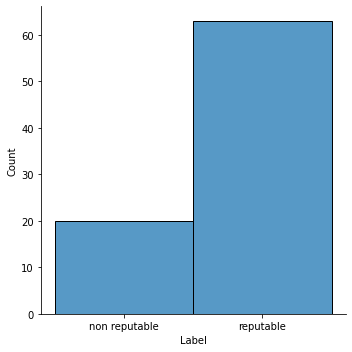

In [1867]:
sns.displot(df, x="Label")
df["Label"].value_counts()

Our data is unbalanced so we might need oversampling

<AxesSubplot:xlabel='total polarity score', ylabel='likeCount'>

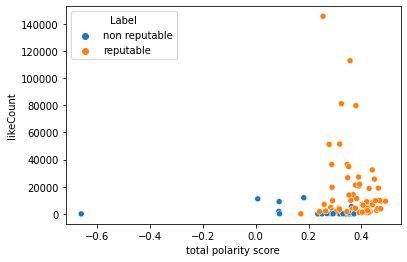

In [1872]:
sns.scatterplot(x="total polarity score", y="likeCount", hue="Label", data = df)